In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'mps')

# Prepare training dataset

In [3]:

transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [16]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [17]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [18]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [19]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [20]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [21]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [22]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [23]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:11, 10.37it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


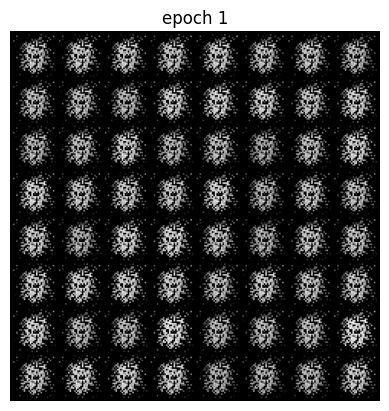

Epoch 1 of 200
Generator loss: -0.23995707, Discriminator loss: 0.42359362


118it [00:11, 10.14it/s]                         


Epoch 2 of 200
Generator loss: -0.00004816, Discriminator loss: 0.00007805


118it [00:11, 10.25it/s]                         


Epoch 3 of 200
Generator loss: -0.00006747, Discriminator loss: 0.00008628


118it [00:11, 10.18it/s]                         


Epoch 4 of 200
Generator loss: -0.00010911, Discriminator loss: 0.00015376


118it [00:11, 10.32it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


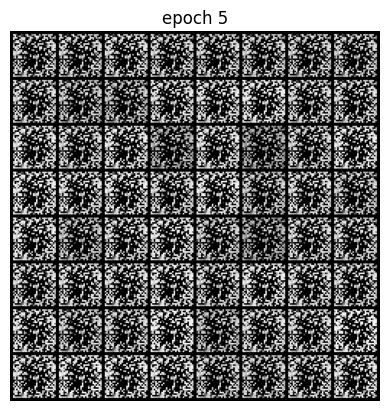

Epoch 5 of 200
Generator loss: -0.00040101, Discriminator loss: 0.00510584


118it [00:11, 10.39it/s]                         


Epoch 6 of 200
Generator loss: -0.00000052, Discriminator loss: 0.00000105


118it [00:11, 10.37it/s]                         


Epoch 7 of 200
Generator loss: -0.00000070, Discriminator loss: 0.00000074


118it [00:11, 10.43it/s]                         


Epoch 8 of 200
Generator loss: -0.00000097, Discriminator loss: 0.00000103


118it [00:11, 10.46it/s]                         


Epoch 9 of 200
Generator loss: -0.00000254, Discriminator loss: 0.00000245


118it [00:11, 10.42it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


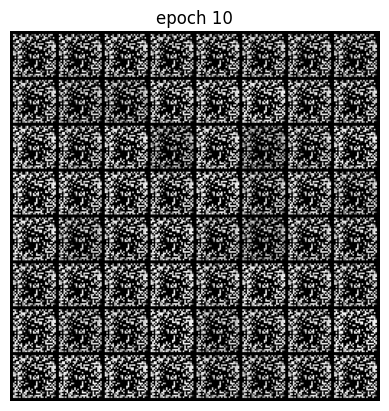

Epoch 10 of 200
Generator loss: -0.00001968, Discriminator loss: 0.00006755


118it [00:11, 10.36it/s]                         


Epoch 11 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.59it/s]                         


Epoch 12 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.50it/s]                         


Epoch 13 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.09it/s]                         


Epoch 14 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.13it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


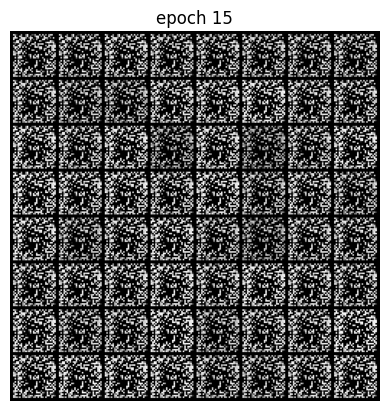

Epoch 15 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.40it/s]                         


Epoch 16 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.47it/s]                         


Epoch 17 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:10, 10.82it/s]                         


Epoch 18 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.68it/s]                         


Epoch 19 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.20it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


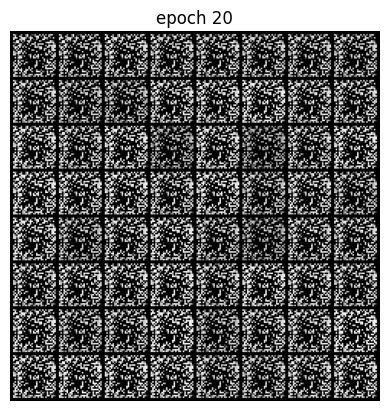

Epoch 20 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.49it/s]                         


Epoch 21 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.40it/s]                         


Epoch 22 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.47it/s]                         


Epoch 23 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11,  9.98it/s]                         


Epoch 24 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.15it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


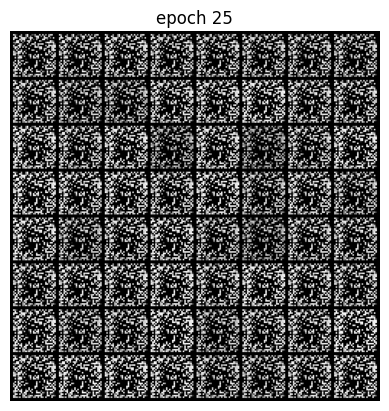

Epoch 25 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.07it/s]                         


Epoch 26 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.15it/s]                         


Epoch 27 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11,  9.93it/s]                         


Epoch 28 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.75it/s]                         


Epoch 29 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11,  9.95it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


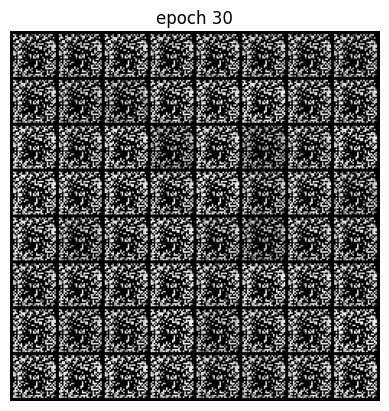

Epoch 30 of 200
Generator loss: -0.00000001, Discriminator loss: 0.00000000


118it [00:11, 10.24it/s]                         


Epoch 31 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:12,  9.57it/s]                         


Epoch 32 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.49it/s]                         


Epoch 33 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.66it/s]                         


Epoch 34 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.31it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


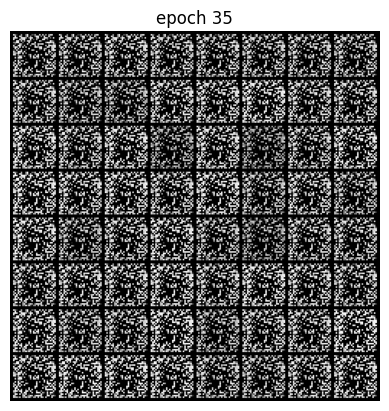

Epoch 35 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.50it/s]                         


Epoch 36 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.33it/s]                         


Epoch 37 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.38it/s]                         


Epoch 38 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.66it/s]                         


Epoch 39 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.19it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


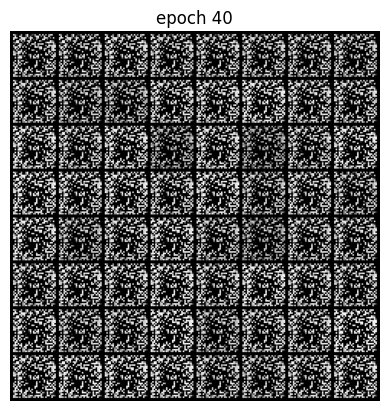

Epoch 40 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:10, 10.79it/s]                         


Epoch 41 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.68it/s]                         


Epoch 42 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.41it/s]                         


Epoch 43 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.27it/s]                         


Epoch 44 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.41it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


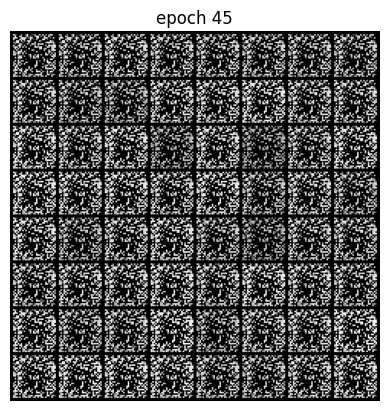

Epoch 45 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.45it/s]                         


Epoch 46 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.11it/s]                         


Epoch 47 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.08it/s]                         


Epoch 48 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.30it/s]                         


Epoch 49 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.36it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


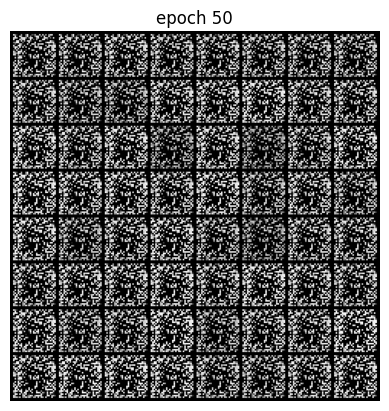

Epoch 50 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.21it/s]                         


Epoch 51 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.67it/s]                         


Epoch 52 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.46it/s]                         


Epoch 53 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.56it/s]                         


Epoch 54 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.73it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


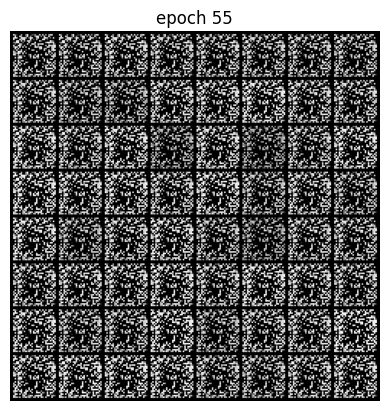

Epoch 55 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.42it/s]                         


Epoch 56 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.64it/s]                         


Epoch 57 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.72it/s]                         


Epoch 58 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.40it/s]                         


Epoch 59 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.63it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


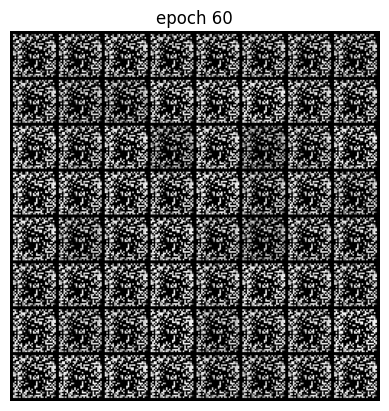

Epoch 60 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.38it/s]                         


Epoch 61 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.63it/s]                         


Epoch 62 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.64it/s]                         


Epoch 63 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.56it/s]                         


Epoch 64 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.47it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


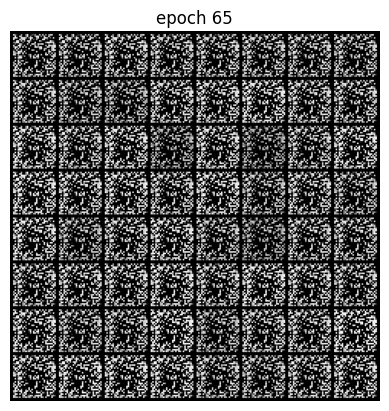

Epoch 65 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.63it/s]                         


Epoch 66 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.64it/s]                         


Epoch 67 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.04it/s]                         


Epoch 68 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.48it/s]                         


Epoch 69 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.46it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


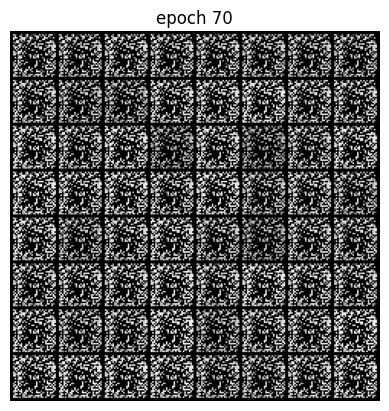

Epoch 70 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.03it/s]                         


Epoch 71 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.43it/s]                         


Epoch 72 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.37it/s]                         


Epoch 73 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.36it/s]                         


Epoch 74 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.46it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


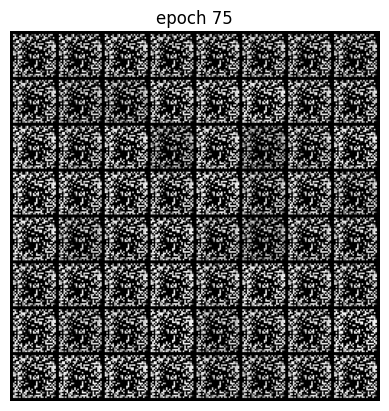

Epoch 75 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11,  9.89it/s]                         


Epoch 76 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.28it/s]                         


Epoch 77 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.20it/s]                         


Epoch 78 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.26it/s]                         


Epoch 79 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.38it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


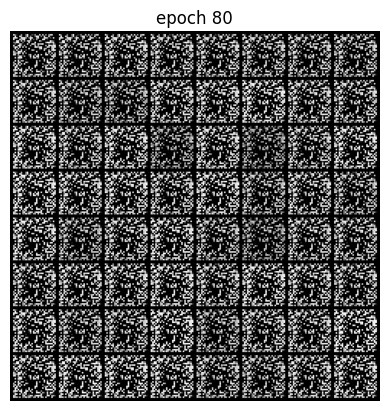

Epoch 80 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.41it/s]                         


Epoch 81 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.34it/s]                         


Epoch 82 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.33it/s]                         


Epoch 83 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.13it/s]                         


Epoch 84 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.13it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


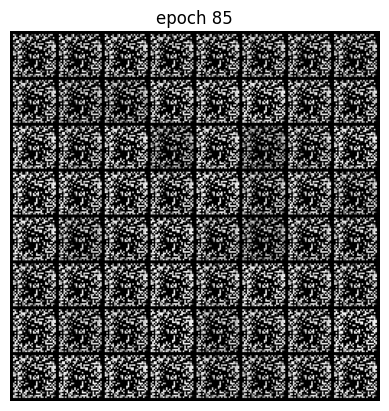

Epoch 85 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.32it/s]                         


Epoch 86 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.52it/s]                         


Epoch 87 of 200
Generator loss: -0.00000018, Discriminator loss: 0.00000075


118it [00:11, 10.32it/s]                         


Epoch 88 of 200
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.56it/s]                         


Epoch 89 of 200
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.49it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


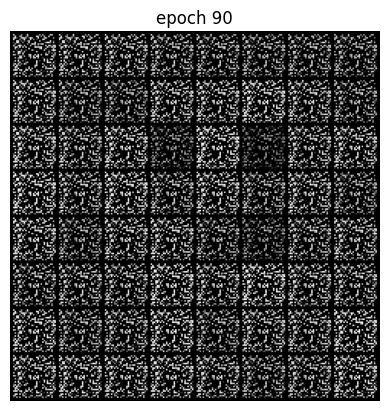

Epoch 90 of 200
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.63it/s]                         


Epoch 91 of 200
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:10, 10.81it/s]                         


Epoch 92 of 200
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.39it/s]                         


Epoch 93 of 200
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.62it/s]                         


Epoch 94 of 200
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.57it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


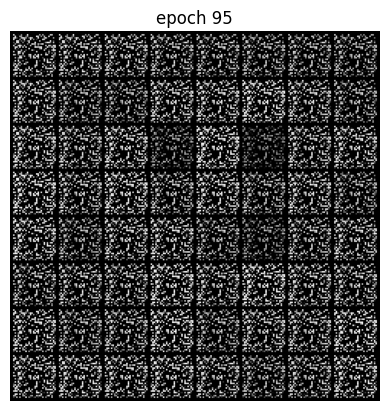

Epoch 95 of 200
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.11it/s]                         


Epoch 96 of 200
Generator loss: -0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.67it/s]                         


Epoch 97 of 200
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.43it/s]                         


Epoch 98 of 200
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.38it/s]                         


Epoch 99 of 200
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:11, 10.12it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


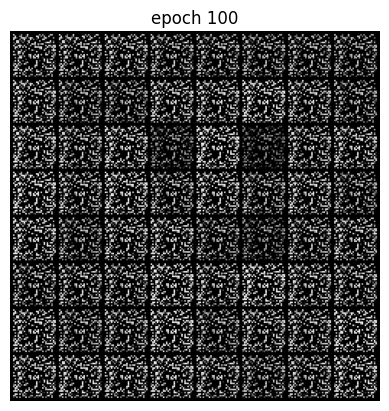

Epoch 100 of 200
Generator loss: 0.00000000, Discriminator loss: 0.00000000


 21%|██▏       | 25/117 [00:02<00:09, 10.03it/s]


KeyboardInterrupt: 

In [24]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    
    
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    
    
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        real_imgs, _ = data
        real_imgs = real_imgs.to(device)

        for i in range(k):
            # Creating fake samples from generator to train the discriminator
            fake_imgs = generator(create_noise(sample_size, nz)).detach()
            fake_lbls = label_fake(fake_imgs.shape[0]).to(device)
           
            # Creating true labels for real images from dataset
            real_lbls = label_real(real_imgs.shape[0]).to(device)
           
            optim_d.zero_grad()

            # Generating first term of the loss from discriminator and backpropagating it
            real_out = discriminator(real_imgs)
            real_loss = discriminator_loss(real_out, real_lbls)
           
            # Generating second term of the loss from discriminator and backpropagating it
            fake_out = discriminator(fake_imgs)
            fake_loss = discriminator_loss(fake_out, fake_lbls)

            real_loss.backward()
            fake_loss.backward()

            optim_d.step()

            # Actual discriminator loss is the sum of both terms
            loss_d += real_loss.item() + fake_loss.item()

        # Training the generator for one step
        fake_imgs = generator(create_noise(sample_size, nz))
        fake_lbls = label_fake(fake_imgs.shape[0])

        optim_g.zero_grad()

        # Passing fake images through discriminator
        output = discriminator(fake_imgs)

        # Generating the loss for the generator 
        gen_loss =  -generator_loss(output, fake_lbls)

        gen_loss.backward()

        optim_g.step()

        loss_g += gen_loss.item()
    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0 or epoch==0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [28]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator_1b.pth')

DONE TRAINING


In [29]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images_1b.gif', imgs)

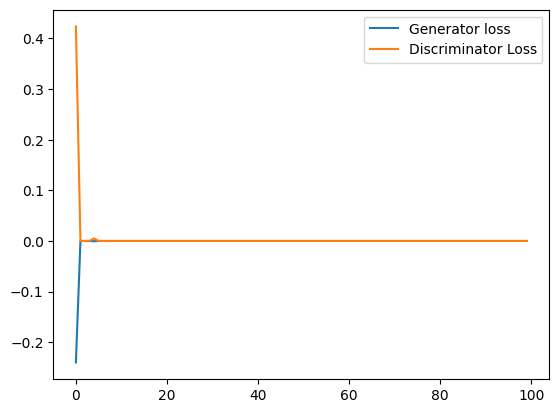

In [30]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss_1b.png')